## Model Training
**Mohammad Amir Saraee**

student number: 400412292

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# دانلود دیتاست MNIST
full_train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# تقسیم به train و validation
train_size = int(0.9 * len(full_train_set))
val_size = len(full_train_set) - train_size
train_set, val_set = random_split(full_train_set, [train_size, val_size])

# DataLoaderها
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=1000, shuffle=False)
test_loader = DataLoader(test_set, batch_size=1000, shuffle=False)

# تعریف مدل
class DigitCNN(nn.Module):
    def __init__(self):
        super(DigitCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64*7*7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

# تعریف مدل، تابع خطا و بهینه‌ساز
model = DigitCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# متغیرهای ثبت دقت و خطا
EPOCHS = 10
train_losses, val_losses, test_losses = [], [], []
train_accs, val_accs, test_accs = [], [], []

for epoch in range(EPOCHS):
    # آموزش
    model.train()
    train_loss, correct, total = 0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accs.append(100 * correct / total)

    # ارزیابی روی validation
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accs.append(100 * correct / total)

    # ارزیابی روی test
    test_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_losses.append(test_loss / len(test_loader))
    test_accs.append(100 * correct / total)

    # گزارش epoch
    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {train_losses[-1]:.4f} Acc: {train_accs[-1]:.2f}% | "
          f"Val Loss: {val_losses[-1]:.4f} Acc: {val_accs[-1]:.2f}% | "
          f"Test Acc: {test_accs[-1]:.2f}%")

# ذخیره مدل
torch.save(model.state_dict(), "digit_cnn.pth")
print("\n[+] Model saved as digit_cnn.pth")




Using device: cuda
Epoch 1/10 | Train Loss: 0.1705 Acc: 94.97% | Val Loss: 0.0672 Acc: 97.85% | Test Acc: 98.22%
Epoch 2/10 | Train Loss: 0.0491 Acc: 98.47% | Val Loss: 0.0427 Acc: 98.65% | Test Acc: 98.84%
Epoch 3/10 | Train Loss: 0.0323 Acc: 98.99% | Val Loss: 0.0525 Acc: 98.42% | Test Acc: 98.73%
Epoch 4/10 | Train Loss: 0.0231 Acc: 99.24% | Val Loss: 0.0431 Acc: 98.73% | Test Acc: 98.92%
Epoch 5/10 | Train Loss: 0.0185 Acc: 99.41% | Val Loss: 0.0439 Acc: 98.72% | Test Acc: 99.00%
Epoch 6/10 | Train Loss: 0.0135 Acc: 99.54% | Val Loss: 0.0457 Acc: 98.82% | Test Acc: 98.91%
Epoch 7/10 | Train Loss: 0.0107 Acc: 99.65% | Val Loss: 0.0514 Acc: 98.75% | Test Acc: 98.89%
Epoch 8/10 | Train Loss: 0.0095 Acc: 99.69% | Val Loss: 0.0535 Acc: 98.90% | Test Acc: 99.02%
Epoch 9/10 | Train Loss: 0.0076 Acc: 99.74% | Val Loss: 0.0456 Acc: 99.02% | Test Acc: 99.14%
Epoch 10/10 | Train Loss: 0.0077 Acc: 99.75% | Val Loss: 0.0514 Acc: 98.83% | Test Acc: 98.92%

[+] Model saved as digit_cnn.pth


 نمودارهای خطا و دقت

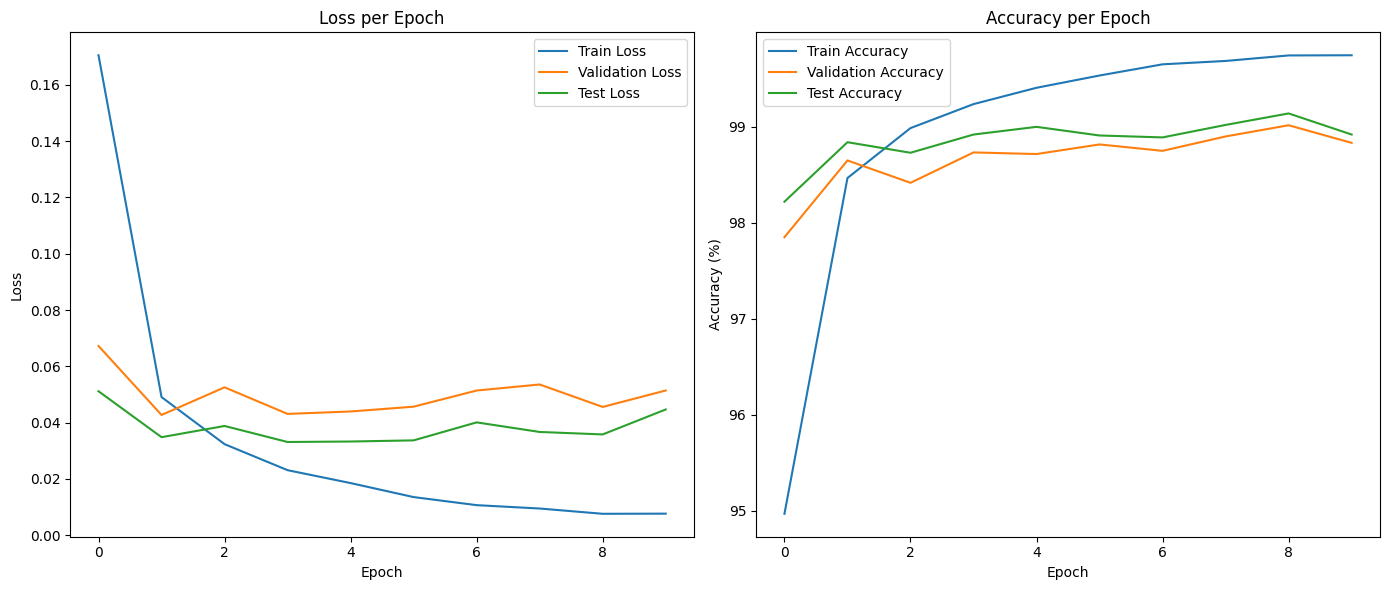


 Final Accuracies:
 Train Accuracy:      99.75%
 Validation Accuracy: 98.83%
 Test Accuracy:       98.92%


In [ ]:
plt.figure(figsize=(14, 6))

# نمودار خطا
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.plot(test_losses, label="Test Loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# نمودار دقت
plt.subplot(1, 2, 2)
plt.plot(train_accs, label="Train Accuracy")
plt.plot(val_accs, label="Validation Accuracy")
plt.plot(test_accs, label="Test Accuracy")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.savefig("training_validation_test_metrics.png")
plt.show()

# خروجی دقت‌ها
print("\n Final Accuracies:")
print(f" Train Accuracy:      {train_accs[-1]:.2f}%")
print(f" Validation Accuracy: {val_accs[-1]:.2f}%")
print(f" Test Accuracy:       {test_accs[-1]:.2f}%")

نمایش تعدادی تصویر رندوم از دیتاست به همراه مقدار پیش‌بینی شده و واقعی


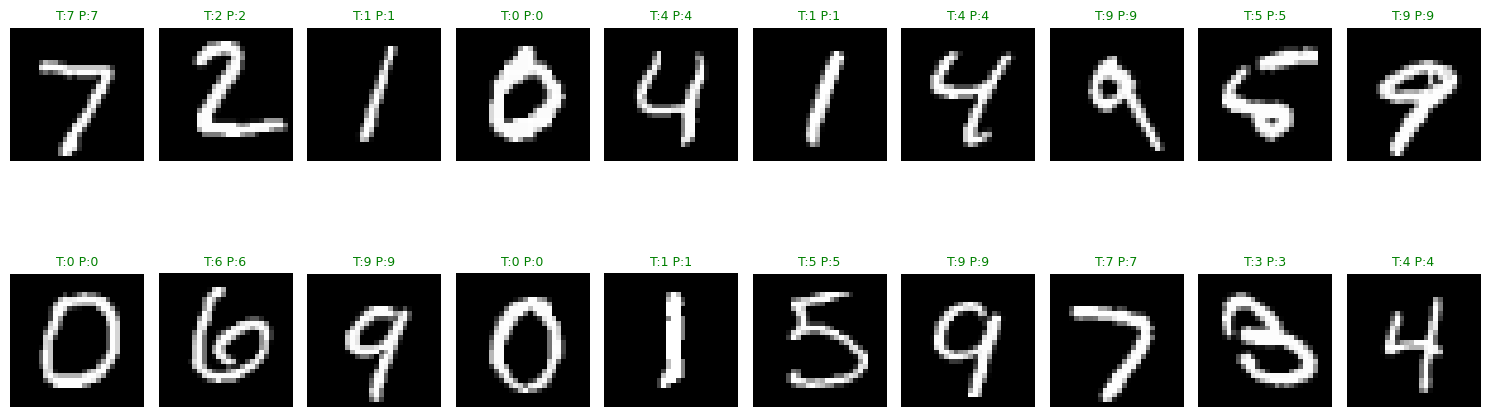

In [ ]:
import random
def show_sample_predictions(model, test_loader, device, num_samples=20):
    model.eval()
    samples_shown = 0
    plt.figure(figsize=(15, 6))

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for i in range(images.size(0)):
                if samples_shown >= num_samples:
                    break
                plt.subplot(2, 10, samples_shown + 1)
                img = images[i].cpu().squeeze().numpy()
                plt.imshow(img, cmap='gray')
                plt.axis('off')
                plt.title(f"T:{labels[i].item()} P:{preds[i].item()}",
                          fontsize=9,
                          color='green' if labels[i]==preds[i] else 'red')
                samples_shown += 1

            if samples_shown >= num_samples:
                break

    plt.tight_layout()
    plt.show()

# نمایش نمونه‌ها
show_sample_predictions(model, test_loader, device)
